## Анализ активности инвестиционных фондов в разрезе стран

В самостоятельном проекте нам нужно проанализировать данные о фондах и инвестициях и написать запросы к базе.

Схема базы данных

[Таблицы из БД](https://www.kaggle.com/datasets/justinas/startup-investments/download?datasetVersionNumber=1)

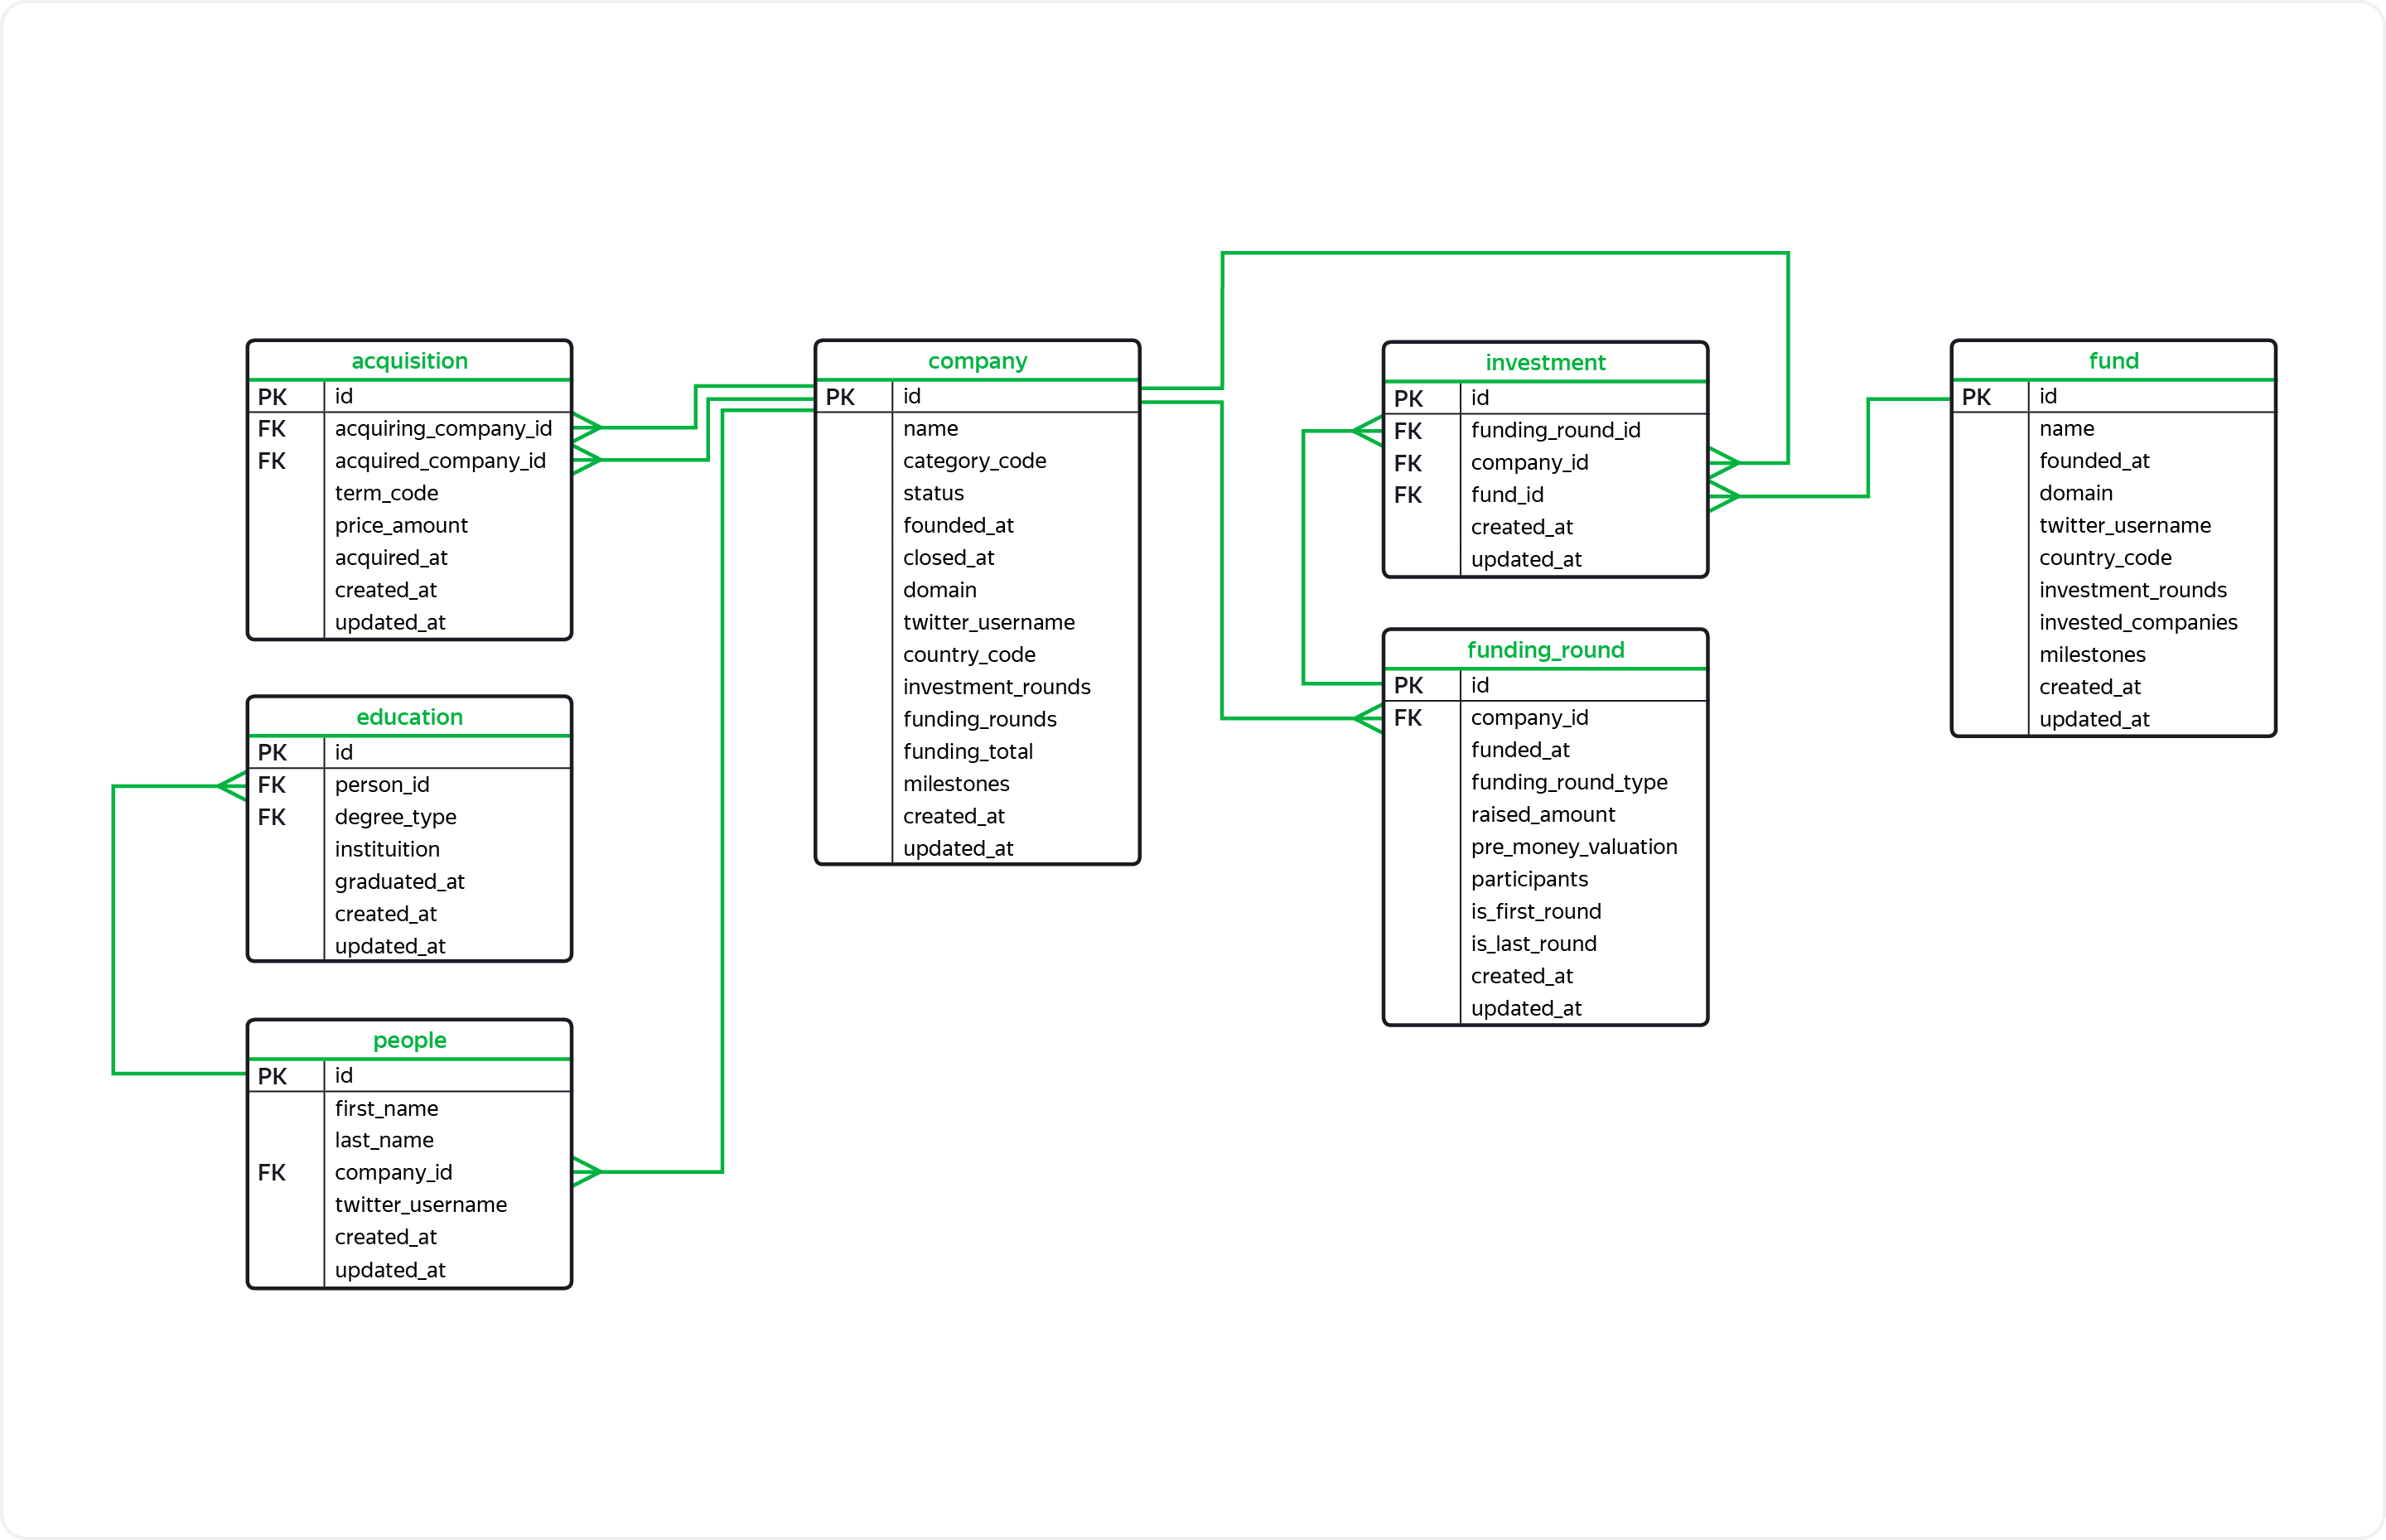

1.
Посчитайте, сколько компаний закрылось.

In [ ]:
SELECT COUNT(id)
FROM company
WHERE status = 'closed'

<b> count  
2584

2.
Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле funding_total .

In [ ]:
SELECT funding_total
FROM company
WHERE country_code = 'USA' AND category_code = 'news'
ORDER BY funding_total DESC;

<b> funding_total  
6.22553e+08  
2.5e+08  
1.605e+08  
........  
0

3.
Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash' 
AND EXTRACT(YEAR FROM acquired_at) IN ('2011',
                                       '2012',
                                       '2013')

**1.37762e+11**

4.
Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'

In [ ]:
SELECT first_name,
       last_name,
       twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%'

<b>first_name   last_name  twitter_username   

Rebecca        	Silver    	SilverRebecca. 

Mattias	Guilotte	Silverreven   

Silver	Teede	SilverMatrixx

5.
Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%'
AND last_name LIKE 'K%'

<b> id	first_name	last_name	company_id	twitter_username	created_at	updated_at  

63081	Gregory	Kim		gmoney75	2010-07-13 03:46:28	2011-12-12 22:01:34


6.
Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
SELECT country_code,
       SUM(funding_total)
FROM company
GROUP BY  country_code
ORDER BY SUM(funding_total) DESC

<b> USA	3.10588e+11  
GBR	1.77056e+10  
1.08559e+10  
CHN	1.06897e+10  
......  
ZWE	0

7.
Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT funded_at,
       MIN(raised_amount),
       MAX(raised_amount)
FROM funding_round
GROUP BY funded_at
HAVING  MIN(raised_amount) <> 0
AND MIN(raised_amount) <> MAX(raised_amount);

<b> funded_at	min	max  
2012-08-22	40000	7.5e+07  
2010-07-25	3.27825e+06	9e+06  
2002-03-01	2.84418e+06	8.95915e+06  
2010-10-11	28000	2e+08  
.....................  
2010-08-06	291	1.45e+07

8.
Создайте поле с категориями:  
Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.  
Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.  
Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.  
Отобразите все поля таблицы fund и новое поле с категориями.

In [ ]:
SELECT *,
CASE
    WHEN invested_companies >= 100 THEN 'high_activity'
    WHEN invested_companies >= 20 AND invested_companies < 100
    THEN 'middle_activity'
    WHEN invested_companies < 20 THEN 'low_activity'
END
FROM fund;

<b>id	name	founded_at	domain	twitter_username	country_code	investment_rounds	invested_companies	milestones	created_at	updated_at	case  
13131						0	0	0	2013-08-19 18:46:55	2013-08-19 19:55:07	low_activity  
1	Greylock Partners	1965-01-01	greylock.com	greylockvc	USA	307	196	0	2007-05-25 20:18:23	2012-12-27 00:42:24	high_activity  
10	Mission Ventures	1996-01-01	missionventures.com		USA	58	33	0	2007-06-05 05:24:58	2013-10-10 22:06:31	middle_activity  
100	Kapor Enterprises, Inc.		kei.com		USA	2	1	0	2007-07-12 09:42:21	2008-11-21 05:41:53	low_activity  
...................  
1022	Breakaway Ventures	2006-01-01	breakawayventures.com	bighugeboston	USA	5	3	0	2008-04-25 09:32:01	2013-05-07 11:09:51	low_activity


9.
Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.


In [ ]:
SELECT
    CASE
        WHEN invested_companies>=100 THEN 'high_activity'
        WHEN invested_companies>=20 THEN 'middle_activity'
        ELSE 'low_activity'
    END AS activity,
    ROUND(AVG(investment_rounds))
FROM fund
GROUP BY activity
ORDER BY ROUND(AVG(investment_rounds));

<b> activity	round  
low_activity  	2  
middle_activity	51  
high_activity	252


10.
Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы.
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Выгрузите десять самых активных стран-инвесторов.
Отсортируйте таблицу по среднему количеству компаний от большего к меньшему, а затем по коду страны в лексикографическом порядке.

In [ ]:
SELECT country_code,
       MIN(invested_companies),
       MAX(invested_companies),
       AVG(invested_companies)
FROM fund
WHERE EXTRACT (YEAR FROM founded_at) IN (2010, 2011,2012)
GROUP BY country_code
HAVING MIN(invested_companies) > 0
ORDER BY AVG(invested_companies) DESC, country_code
LIMIT 10;

<b> country_code	min	max	avg  
BGR	25	35	30  
CHL	29	29	29  
UKR	8	10	9  
LTU	5	5	5  
IRL	4	5	4.5  
KEN	3	3	3  
LBN	3	3	3  
MUS	3	3	3  
JPN	1	6	2.83333  
HKG	2	3	2.66667. 




11.
Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
SELECT p.first_name,
       p.last_name,
       e.instituition
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id;

<b> first_name	last_name	instituition  
John	Green	Washington University, St. Louis  
John	Green	Boston University  
David	Peters	Rice University  
Dan	Birdwhistell	University of Cambridge  
Gal	Cohen	Tel Aviv University  
...........................  
Iqram	Magdon-Ismail	U Penn

12.
Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
SELECT c.name,
COUNT(DISTINCT e.instituition)
FROM company AS c
JOIN people AS p ON c.id = p.company_id
JOIN education AS e ON p.id = e.person_id
GROUP BY c.name
ORDER BY COUNT(DISTINCT e.instituition) DESC
LIMIT 5;

<b>name	count  
Google	167  
Yahoo!	115  
Microsoft	111  
Knight Foundation	74  
Comcast	66

13.
Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
SELECT DISTINCT name
FROM company AS c
JOIN funding_round AS fr ON c.id = fr.company_id
WHERE STATUS ='closed'
AND is_first_round = 1
AND is_last_round = 1
GROUP BY name;

<b> name  
10BestThings  
11i Solutions. 
169 ST.  
1bib. 
............  
Carbonetworks

14.
Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
SELECT DISTINCT p.id
FROM people AS p
WHERE p.company_id IN
                     (SELECT c.id
                      FROM company AS c
                      JOIN funding_round AS fr ON c.id = fr.company_id
                      WHERE STATUS ='closed'
                      AND is_first_round = 1
                      AND is_last_round = 1
                      GROUP BY c.id);

<b>id  
62  
97   
98  
225  

15.
Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
SELECT p.id,
       e.instituition
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id
WHERE p.company_id IN
                    (SELECT c.id
                    FROM company AS c
                    JOIN funding_round AS fr ON c.id = fr.company_id
                    WHERE STATUS ='closed'
                    AND is_first_round = 1
                    AND is_last_round = 1
                    GROUP BY c.id)
GROUP BY p.id, e.instituition
HAVING instituition IS NOT NULL;

<b> id	instituition  
349	AKI  
349	ArtEZ Hogeschool voor de Kunsten  
349	Rijks Akademie  
699	Imperial College  
...................  
67273	Lehigh University

16.
Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [ ]:
SELECT p.id,
       COUNT(e.instituition)
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id
WHERE p.company_id IN
                    (SELECT c.id
                    FROM company AS c
                    JOIN funding_round AS fr ON c.id = fr.company_id
                    WHERE STATUS ='closed'
                    AND is_first_round = 1
                    AND is_last_round = 1
                    GROUP BY c.id)
GROUP BY p.id
HAVING COUNT(DISTINCT e.instituition) >0;

<b> id	count  
349	3  
699	1  
779	2  
968	1  
............  
137265	1

17.
Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.


In [ ]:
WITH 
base AS (SELECT p.id,
        COUNT(e.instituition)
        FROM people AS p
        LEFT JOIN education AS e ON p.id = e.person_id
        WHERE p.company_id IN
                    (SELECT c.id
                    FROM company AS c
                    JOIN funding_round AS fr ON c.id = fr.company_id   
                    WHERE STATUS ='closed'
                    AND is_first_round = 1
                    AND is_last_round = 1
                    GROUP BY c.id)
GROUP BY p.id
HAVING COUNT(DISTINCT e.instituition) > 0)
SELECT AVG(COUNT)
FROM base;

<b>avg  
1.41509


18.
Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*.
*(сервис, запрещённый на территории РФ)

In [ ]:
WITH base AS
  (SELECT p.id,
          COUNT(e.instituition)
   FROM people AS p
   RIGHT JOIN education AS e ON p.id = e.person_id
   WHERE p.company_id IN
       (SELECT id
        FROM company
        WHERE name = 'Facebook')
   GROUP BY p.id)
SELECT AVG(COUNT)
FROM base;

<b>avg  
1.51111


19.
Составьте таблицу из полей:  
name_of_fund — название фонда;  
name_of_company — название компании;  
amount — сумма инвестиций, которую привлекла компания в раунде.  
В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name AS name_of_fund,
       c.name AS name_of_company,
       fr.raised_amount AS amount
FROM investment AS i
LEFT JOIN company AS c ON c.id = i.company_id
LEFT JOIN fund AS f ON i.fund_id = f.id
INNER JOIN
  (SELECT*
   FROM funding_round
   WHERE funded_at BETWEEN '2012-01-01' AND '2013-12-31') AS fr ON fr.id = i.funding_round_id
WHERE c.milestones > 6;

<b>name_of_fund	name_of_company	amount  
Advance Publication	Gigya	1.53e+07  
Mayfield Fund	Gigya	1.53e+07  
Benchmark	Gigya	1.53e+07  
......................  
DAG Ventures	Gigya	2.5e+07


20.
Выгрузите таблицу, в которой будут такие поля:
название компании-покупателя;
сумма сделки;
название компании, которую купили;
сумма инвестиций, вложенных в купленную компанию;
доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.
Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

In [ ]:
WITH 
acquiring AS
  (SELECT c.name AS buyer,
          a.price_amount AS price,
          a.id AS KEY
   FROM acquisition AS a
   LEFT JOIN company AS c ON a.acquiring_company_id = c.id
   WHERE a.price_amount > 0),
     acquired AS
  (SELECT c.name AS acquisition,
          c.funding_total AS investment,
          a.id AS KEY
   FROM acquisition AS a
   LEFT JOIN company AS c ON a.acquired_company_id = c.id
   WHERE c.funding_total > 0)
SELECT acqn.buyer,
       acqn.price,
       acqd.acquisition,
       acqd.investment,
       ROUND(acqn.price / acqd.investment) AS uplift
FROM acquiring AS acqn
JOIN acquired AS acqd ON acqn.KEY = acqd.KEY
ORDER BY price DESC,
         acquisition
LIMIT 10;

<b> buyer	price	acquisition	investment	uplift  
Microsoft	8.5e+09	Skype	7.6805e+07	111  
Scout Labs	4.9e+09	Varian Semiconductor Equipment Associates	4.8e+06	1021  
Broadcom	3.7e+09	Aeluros	7.97e+06	464  
..................................  
IAC	1.85e+09	Ask.com	2.5e+07	74

21.
Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
SELECT c.name AS social_co,
       EXTRACT (MONTH
                FROM fr.funded_at) AS funding_month
FROM company AS c
LEFT JOIN funding_round AS fr ON c.id = fr.company_id
WHERE c.category_code = 'social'
  AND fr.funded_at BETWEEN '2010-01-01' AND '2013-12-31'
  AND fr.raised_amount <> 0;

<b> social_co	funding_month  
Klout	1  
WorkSimple	3  
HengZhi	1  
Twitter	1  
.........  
Startup Weekend	9

22.
Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
номер месяца, в котором проходили раунды;
количество уникальных названий фондов из США, которые инвестировали в этом месяце;
количество компаний, купленных за этот месяц;
общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH 
fundings AS
  (SELECT EXTRACT(MONTH
                  FROM CAST(fr.funded_at AS DATE)) AS funding_month,
          COUNT(DISTINCT f.id) AS us_funds
   FROM fund AS f
   LEFT JOIN investment AS i ON f.id = i.fund_id
   LEFT JOIN funding_round AS fr ON i.funding_round_id = fr.id
   WHERE f.country_code = 'USA'
     AND EXTRACT(YEAR
                 FROM CAST(fr.funded_at AS DATE)) BETWEEN 2010 AND 2013
   GROUP BY funding_month),
acquisitions AS
  (SELECT EXTRACT(MONTH
                  FROM CAST(acquired_at AS DATE)) AS funding_month,
          COUNT(acquired_company_id) AS bought_co,
          SUM(price_amount) AS sum_total
   FROM acquisition
   WHERE EXTRACT(YEAR
                 FROM CAST(acquired_at AS DATE)) BETWEEN 2010 AND 2013
   GROUP BY funding_month)
SELECT fnd.funding_month,
       fnd.us_funds,
       acq.bought_co,
       acq.sum_total
FROM fundings AS fnd
LEFT JOIN acquisitions AS acq ON fnd.funding_month = acq.funding_month;

<b>funding_month	us_funds	bought_co	sum_total  
1	815	600	2.71083e+10  
2	637	418	4.13903e+10  
3	695	458	5.95016e+10  
...................  
12	590	433	3.74251e+10

23.
Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH 
y_11 AS
  (SELECT country_code AS country,
          AVG(funding_total) AS y_2011
   FROM company
   WHERE EXTRACT(YEAR
                 FROM founded_at::DATE) IN(2011,
                                           2012,
                                           2013)
   GROUP BY country,
            EXTRACT(YEAR
                    FROM founded_at)
   HAVING EXTRACT(YEAR
                  FROM founded_at) = '2011'),
y_12 AS
  (SELECT country_code AS country,
          AVG(funding_total) AS y_2012
   FROM company
   WHERE EXTRACT(YEAR
                 FROM founded_at::DATE) IN(2011,
                                           2012,
                                           2013)
   GROUP BY country,
            EXTRACT(YEAR
                    FROM founded_at)
   HAVING EXTRACT(YEAR
                  FROM founded_at) = '2012'),
y_13 AS
  (SELECT country_code AS country,
          AVG(funding_total) AS y_2013
   FROM company
   WHERE EXTRACT(YEAR
                 FROM founded_at::DATE) IN(2011,
                                           2012,
                                           2013)
   GROUP BY country,
            EXTRACT(YEAR
                    FROM founded_at)
   HAVING EXTRACT(YEAR
                  FROM founded_at) = '2013')
SELECT y_11.country,
       y_2011,
       y_2012,
       y_2013
FROM y_11
JOIN y_12 ON y_11.country = y_12.country
JOIN y_13 ON y_12.country = y_13.country
ORDER BY y_2011 DESC;

<b>country	y_2011	y_2012	y_2013  
PER	4e+06	41000	25000  
USA	2.24396e+06	1.20671e+06	1.09336e+06  
HKG	2.18078e+06	226227	0  
PHL	1.75e+06	4218.75	2500  
......................  
LKA	0	0	0